In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
seed = 739

# Обработка данных

## Загрузка данных

In [3]:
train_df = pd.read_csv('data/train.csv', delimiter=',')
# cntrbtrs = pd.read_csv('data/cntrbtrs.csv', delimiter=';')
# trnsctns = pd.read_csv('data/trnsctns.csv', delimiter=';')

In [4]:
years = sorted(train_df["year"].unique())
churn_average = train_df.groupby("year")["churn"].sum().values
users_per_year = train_df.groupby("year")["churn"].count().values

График зависимости количества ушедших клиентов от года

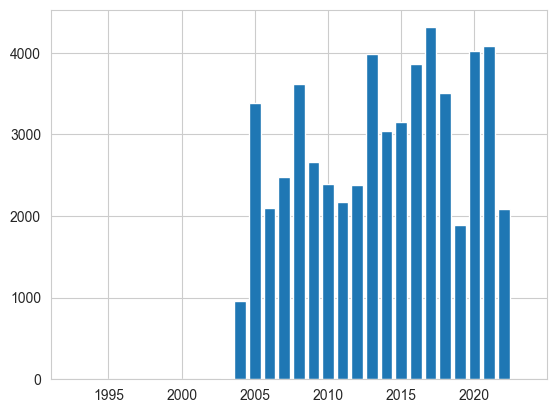

In [5]:
import matplotlib.pyplot as plt


plt.bar(x=years, height=churn_average)
plt.show()

График зависимости количества неушедших клиентов от года

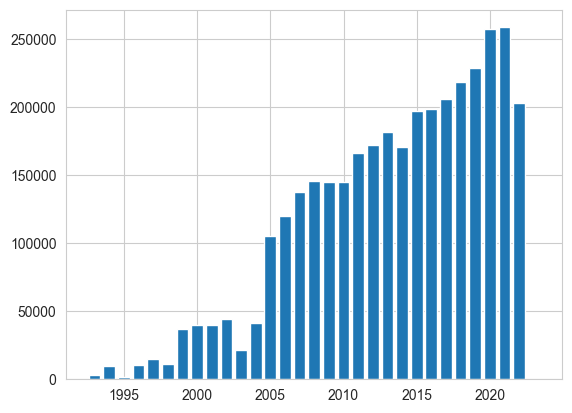

In [6]:
plt.bar(x=years, height=(users_per_year - churn_average))
plt.show()

Берем данные только с 2003 года

In [4]:
train_df = train_df.loc[train_df['year'] >= 2003]

In [8]:
train_df['year'].min()

2003

In [9]:
from IPython.display import display

display(train_df.head(7).T)
# display(trnsctns.head(7))
# display(cntrbtrs.head(7))

,0,1,2,3,4,5,6
slctn_nmbr,1,0,2,0,0,1,0
client_id,0xA095932790098744A2325A8D152C05C7,0xF75BAA20A603A2479005DEB80464336E,0x0D18081E0556AF4F95A931FBA4159D52,0x0AD72BC5475D9A4D83E12350A84F839D,0x73DF06339CC25840838408BAD52BE223,0x092BC8229C2770459A87E35C754892E0,0x4768BFF110D93941963C2379F667A77E
npo_account_id,0xD4DBBAC6561929409BA45725A220613E,0x3DCFF11974B3D8458CE3569DE9E855D5,0x9DADF88CB3407C4E89403315F640393E,0xF59C4E62F115684899EAE9B5D5ECF70F,0x35BFFA05321C014B9FC29A189E89EDF0,0x55B01C14C2640948A54F2F3A0FB715A1,0x36C2EC983556E443817033C4032D7BA8
npo_accnts_nmbr,1,2,1,1,2,1,1
pmnts_type,2,2,1,1,2,2,2
year,2017,2009,2010,2005,2007,2007,2004
quarter,2017Q4,2009Q1,2010Q1,2005Q4,2007Q4,2007Q3,2004Q4
gender,1,1,1,-1,1,-1,-1
age,48,35,47,42,42,50,29
clnt_cprtn_time_d,8091,3303,1163,47,876,3536,2031


## Просмотр данных

In [10]:
display(train_df.info())
# display(trnsctns.info())
# display(cntrbtrs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3377386 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64
 22 

None

## Добавление новых столбцов

In [5]:
currency_df = pd.read_csv('external_data/currency.csv')
GDP_df = pd.read_csv('external_data/GDP.csv')
inflation_df = pd.read_csv('external_data/inflation.csv')
unemployment_df = pd.read_csv('external_data/Unemployment.csv')

In [6]:
display(GDP_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  84 non-null     object 
 1   GDP      84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


None

In [7]:
for i, quarter in tqdm(enumerate(currency_df.loc[:, 'quarter'])):
    train_df.loc[train_df['quarter'] == quarter, 'currency'] = currency_df.iloc[i, 1]
    train_df.loc[train_df['quarter'] == quarter, 'GDP'] = GDP_df.iloc[i, 1]
    train_df.loc[train_df['quarter'] == quarter, 'inflation'] = inflation_df.iloc[i, 1]
    train_df.loc[train_df['quarter'] == quarter, 'unemployment'] = unemployment_df.iloc[i, 0]
train_df.head(5)

84it [00:38,  2.20it/s]


,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
0,1,0xA095932790098744A2325A8D152C05C7,0xD4DBBAC6561929409BA45725A220613E,1,2,2017,2017Q4,1,48,8091,...,САМАРСКАЯ ОБЛ,-1,-1,0,0,0,58.402211,25621.2,2.583333,5.07
1,0,0xF75BAA20A603A2479005DEB80464336E,0x3DCFF11974B3D8458CE3569DE9E855D5,2,2,2009,2009Q1,1,35,3303,...,ЛИПЕЦКАЯ ОБЛ,-1,1,0,1,0,34.392777,8334.6,13.726667,8.87
2,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2010,2010Q1,1,47,1163,...,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,29.842293,9995.8,7.220000,8.67
3,0,0x0AD72BC5475D9A4D83E12350A84F839D,0xF59C4E62F115684899EAE9B5D5ECF70F,1,1,2005,2005Q4,-1,42,47,...,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,0,28.713011,6228.1,11.286667,7.00
4,0,0x73DF06339CC25840838408BAD52BE223,0x35BFFA05321C014B9FC29A189E89EDF0,2,2,2007,2007Q4,1,42,876,...,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0,24.648172,9797.0,11.396667,5.80


## Обработка пропущенных данных

### Train.csv

Пустые столбцы:
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- postal_code
- region

In [14]:
train_df.loc[train_df['postal_code'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
41,1,0xD6BB7D1CE90B704084220E02EF43C0EB,0xD4A8542016584244ACD51BDB7539BBDD,1,2,2013,2013Q1,1,46,5459,...,МАРИЙ ЭЛ РЕСП,-1,-1,0,0,0,30.415821,16370.0,7.123333,5.83
159,1,0xCC7AA428C09DFE489587D2512A49D68D,0xEA4AB771C1CC854BB4792B85E6422F05,1,2,2020,2020Q4,-1,60,8488,...,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0,76.203011,31230.5,4.436667,6.10
244,1,0x2264D51A1838844E8A01D150793CFFB6,0x8703B083DEBA674695B1099E651A03F1,1,2,2004,2004Q1,-1,40,2374,...,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0,28.627820,3515.7,10.703333,8.77
329,1,0x6A696B387083DB49AC8F435F80551DD4,0xF1E63A6D40734945A0FDB1AA16D06817,1,2,2014,2014Q1,-1,62,6783,...,САМАРСКАЯ ОБЛ,1,-1,0,0,0,35.143616,17311.4,6.390000,5.53
513,1,0x5BCE8B25387D3540968444811F3A1BFE,0xE47B19BF91AAEE43BEEF1AD84611ABB9,1,2,2011,2011Q1,-1,53,4954,...,САНКТ-ПЕТЕРБУРГ Г,1,-1,0,0,0,29.163959,13024.8,9.496667,7.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589356,1,0x9709AD2C1655C04F8BB849D57EC77CD5,0x4AD22502210180469AF926CA7608DA38,1,2,2013,2013Q1,-1,42,5676,...,КОМИ РЕСП,1,-1,0,0,0,30.415821,16370.0,7.123333,5.83
3589430,1,0x4F8F361FA9D4A54898EDFAC7AEDE9074,0x1A67F7F07ADCDA4C8E6F8BB43AB3FED2,1,2,2016,2016Q4,1,49,6884,...,ПСКОВСКАЯ ОБЛ,-1,-1,0,0,0,62.980128,24043.6,5.743333,5.37
3589487,1,0xA1C282E4166ED146AB84414654531D98,0x3E273D876E3AAD458653B92984A8E492,1,2,2021,2021Q4,1,56,8803,...,ВОЛОГОДСКАЯ ОБЛ,1,-1,0,0,0,72.654305,40111.5,8.310000,4.30
3589599,1,0xE55F21DD252F5F4D9F21C705BB263309,0xA2F3BD5DC3782B49BBBB9BE438C3C37D,1,2,2015,2015Q4,1,80,6395,...,КУРСКАЯ ОБЛ,1,-1,0,0,0,66.052642,23079.8,14.493333,5.70


In [15]:
train_df.loc[(train_df['postal_code'] < 100000) & (0 < train_df['postal_code']) & train_df['region'].notna()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
8902,2,0x6046E45BF0AD144BA9FCFABB9C0047A2,0xFDC622E2D8994546B61DB7B0A3929DFC,1,2,2014,2014Q4,-1,54,2928,...,НИЖЕГОРОДСКАЯ ОБЛ,1,1,0,0,0,47.553931,22130.5,9.576667,5.20
14102,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2014,2014Q4,1,59,2535,...,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0,47.553931,22130.5,9.576667,5.20
21565,2,0x303CA3350527204990B40FD2527617D6,0xEB9B1B64C594BD449BB8EFC20A137C0F,1,2,2012,2012Q4,-1,45,2225,...,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС,1,1,0,0,0,31.079048,18768.9,6.533333,5.13
32913,1,0xA300B8F39716DD44A1797F982CFBEA1B,0x97200DA97B3DFC498C664B6E5F2B5168,1,2,2010,2010Q1,-1,55,4635,...,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0,29.842293,9995.8,7.220000,8.67
39009,2,0x5BF4871F3B605940BF10FB78DB8D8F38,0xAB3B92B38CEA6B479A7E3A4C9E224620,2,1,2021,2021Q4,1,37,5346,...,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0,72.654305,40111.5,8.310000,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573483,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2017,2017Q4,1,58,7466,...,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0,58.402211,25621.2,2.583333,5.07
3577420,0,0x45D8D608FD45C9469BA39AEF5AE8DA14,0x1A1E4CD44FDFE742809A3F9B6F6D676A,3,1,2022,2022Q1,1,64,1522,...,САМАРСКАЯ ОБЛ,1,1,0,1,0,87.347863,36398.5,11.533333,4.20
3581003,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2018,2018Q4,1,59,7831,...,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0,66.517628,29220.6,3.883333,4.77
3588050,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2010,2010Q4,1,55,1074,...,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0,30.716354,13249.3,8.113333,6.77


Вычислим регионы по почтовым индексам

In [8]:
buffer = train_df.loc[train_df['region'].notna() & train_df['postal_code'].notna() & train_df['postal_code'] > 0]
dict_ = {str(code)[-3:]: region for (region, code) in zip(buffer['region'], buffer['postal_code'])}

buffer = train_df.loc[train_df['region'].isna() & train_df['postal_code'].notna()]

In [9]:
dict_["0"] = np.NAN
list_ = []

for i, row in buffer.iterrows():
    code = str(row['postal_code'])[-3:]
    list_.append(dict_[code])

train_df.loc[train_df.loc[:, 'region'].isna() & train_df.loc[:, 'postal_code'].notna(), 'region'] = pd.Series(list_)

In [18]:
train_df.loc[train_df['region'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
179,0,0xCDC5031E97872845A7B84E4A672CB6D7,0x844F25196F78134B9B32E06D6C377E87,1,1,2010,2010Q3,1,58,3734,...,NaN,-1,-1,0,1,0,30.618964,12086.5,6.153333,6.67
301,0,0x4CCF461FFCED7948BCFCA3D0E6631F4B,0x105D7DF015BFE540B0B044BA1C25A0C2,1,2,2006,2006Q3,1,55,2669,...,NaN,-1,-1,0,1,0,26.805697,7275.8,9.440000,6.73
349,0,0x3BD5BA047DC4F94E95B926564D190955,0xA343B4FD6667E546BF177B4D8B467994,1,2,2005,2005Q1,1,27,1940,...,NaN,-1,-1,0,1,0,27.854109,4458.6,13.096667,7.80
356,0,0x18A67B35EA569842A696521BBBEA7CFB,0x6815EF1CAB03E44DB6A7ECD8F65729C1,1,2,2004,2004Q4,1,30,1510,...,NaN,-1,-1,0,1,1,28.519670,4945.9,11.656667,7.80
430,0,0x5A6212B18810D149A6E5C5144B072B4C,0xE8FAF77410253C4FA0252094E715C86A,1,2,2005,2005Q1,1,60,2121,...,NaN,-1,-1,0,1,0,27.854109,4458.6,13.096667,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589855,0,0xD9C0B98EAC90434C809BF7FCCAE6D0B1,0x522F0039600CEE44B5FB0C47E3436AE0,1,2,2007,2007Q4,1,29,721,...,NaN,-1,-1,0,1,1,24.648172,9797.0,11.396667,5.80
3589861,0,0x629D926F2F0BE146B6CF85E76DF99B67,0x5705A6AB4E5FCE46872A9B7BA54A0726,2,2,2005,2005Q1,-1,57,2100,...,NaN,-1,-1,0,1,1,27.854109,4458.6,13.096667,7.80
3589866,0,0x5D967965E5B20A42B319A01769D1F5CE,0xD6F0FF7F5CA260418E4AEB105F9F1670,1,1,2008,2008Q4,1,45,351,...,NaN,1,1,0,1,0,27.264595,10618.9,13.763333,6.97
3589868,0,0xC531125F77C579409E05149D24A0531F,0x29BA9F7D2CC6944D9ACC07290438A034,2,3,2018,2018Q1,-1,47,671,...,NaN,-1,1,0,1,0,56.814870,22474.5,2.256667,5.07


Проверяем пустые строки

In [10]:
for col in train_df.columns:
    if len(train_df.loc[train_df[col].isna()]) != 0:
        print(col, len(train_df.loc[train_df[col].isna()]))

frst_pmnt_date 32435
lst_pmnt_date_per_qrtr 964876
postal_code 99488
region 129460


In [11]:
train_df['region'].fillna('Неизвестен', inplace=True)

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_14367/736859608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['region'].fillna('Неизвестен', inplace=True)


### Удаляем лишние столбцы
- slctn_nmbr
- client_id
- npo_account_id
- year
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- pmnts_sum_per_year
- pmnts_nmbr_per_year
- incm_per_year
- phone_number
- email
- postal_code

In [12]:
train_df.drop(columns=[
    'postal_code',
    'slctn_nmbr',
    'client_id',
    'npo_account_id',
    'year',
    'frst_pmnt_date',
    'lst_pmnt_date_per_qrtr'
], inplace=True)

In [13]:
len(train_df.columns.to_list())

39

## Графики

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Берем столбцы по типу данных

In [15]:
int_cols = train_df.select_dtypes(int).columns.to_list()
float_cols = train_df.select_dtypes(float).columns.to_list()
cat_cols = train_df.select_dtypes(object).columns.to_list()
display(int_cols, float_cols, cat_cols)

['npo_accnts_nmbr',
 'pmnts_type',
 'gender',
 'age',
 'clnt_cprtn_time_d',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'pmnts_nmbr',
 'pmnts_nmbr_per_qrtr',
 'pmnts_nmbr_per_year',
 'phone_number',
 'email',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt',
 'churn']

['balance',
 'oprtn_sum_per_qrtr',
 'oprtn_sum_per_year',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_sum_per_qrtr',
 'pmnts_sum_per_year',
 'incm_sum',
 'incm_per_qrtr',
 'incm_per_year',
 'mgd_accum_period',
 'mgd_payment_period',
 'currency',
 'GDP',
 'inflation',
 'unemployment']

['quarter', 'region']

Убираем выбросы

In [16]:
def selection_data(df: pd.DataFrame, cols: list[str], n=1.5):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_min = q1 - n * iqr
        lim_max = q3 + n * iqr
        
        df = df.loc[(df[col] >= lim_min) & (df[col] <= lim_max)]
    return df


buffer = train_df.copy()
buffer = selection_data(buffer, ['balance', 'oprtn_sum_per_qrtr',
                                 'frst_pmnt', 'lst_pmnt',
                                 'pmnts_sum', 'pmnts_sum_per_qrtr',
                                 'incm_sum', 'incm_per_qrtr',
                                 'pmnts_sum_per_year',
                                 'oprtn_sum_per_year', 'incm_per_year',
                                 'age'])
len(buffer), len(train_df)

(1008745, 3377386)

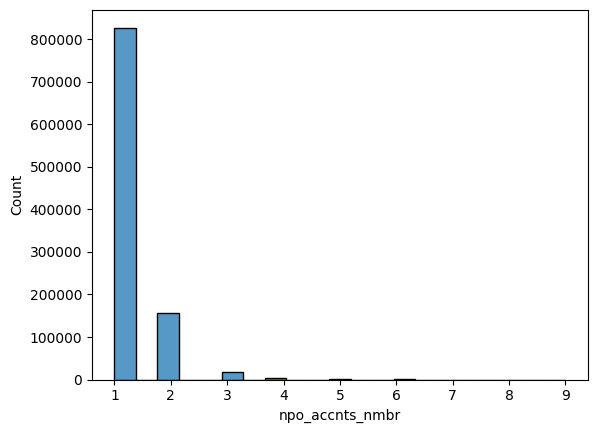

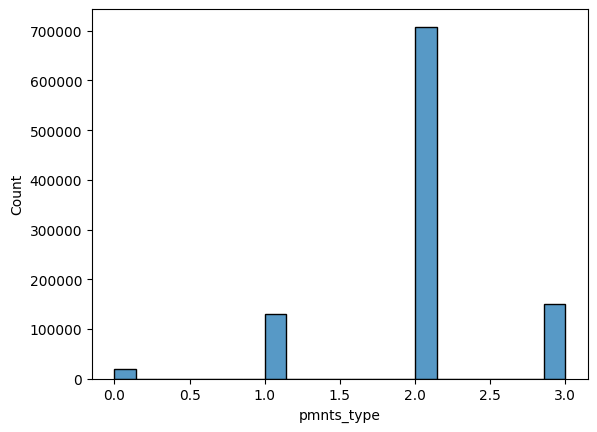

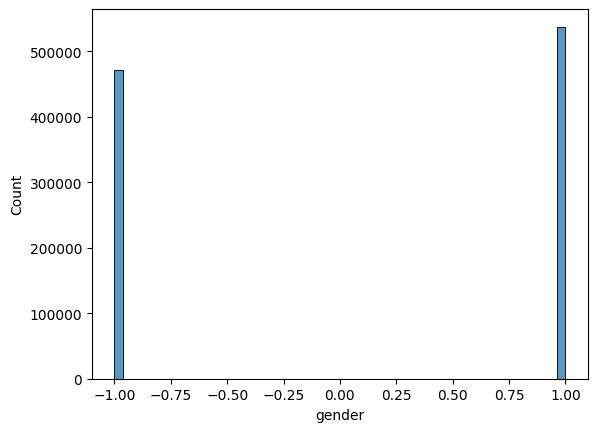

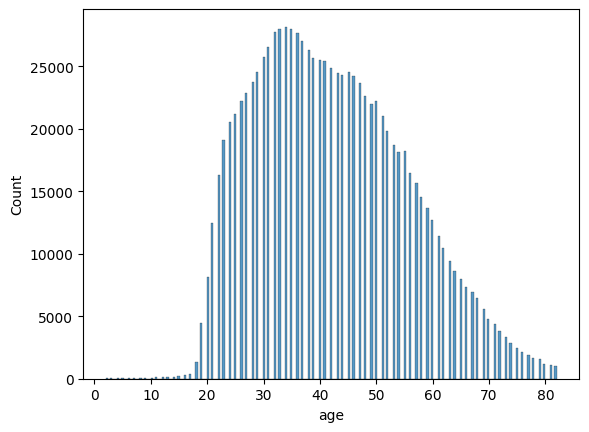

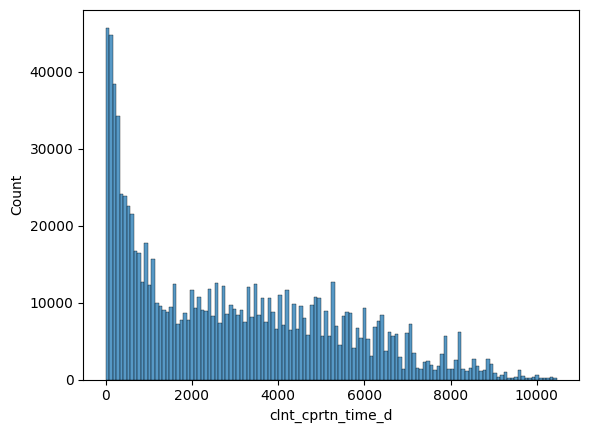

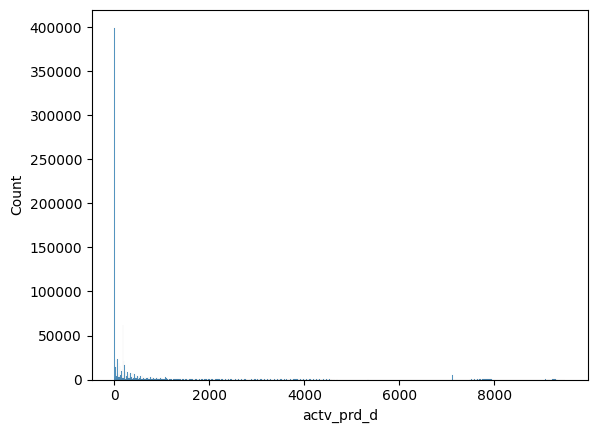

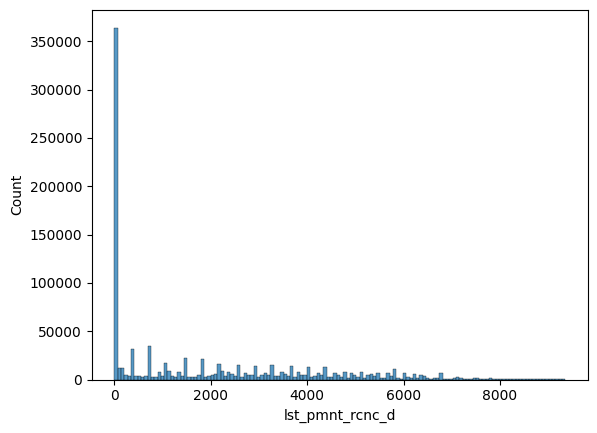

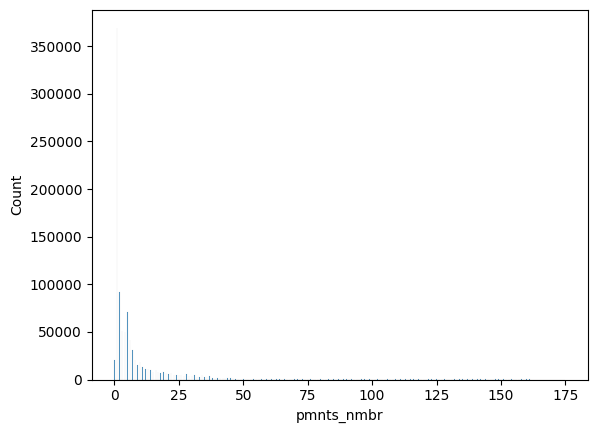

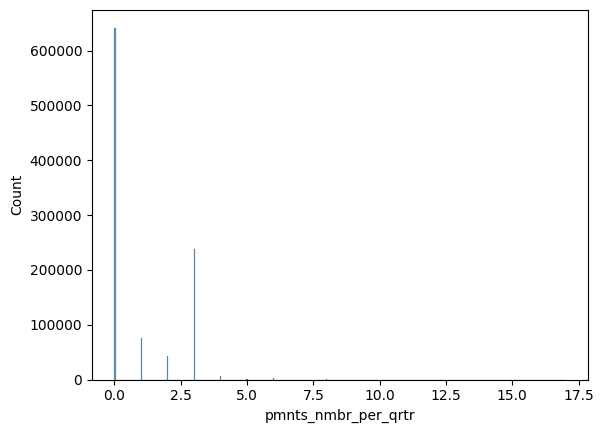

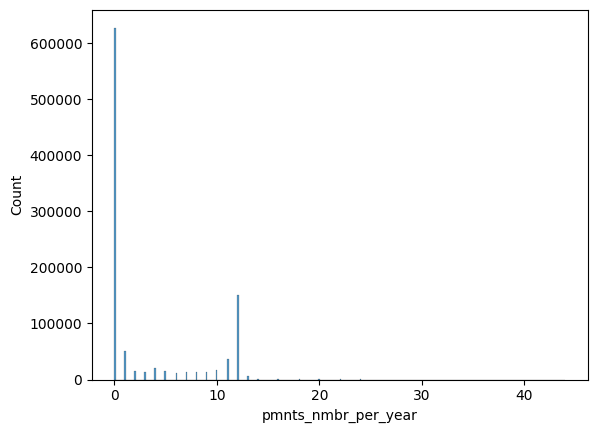

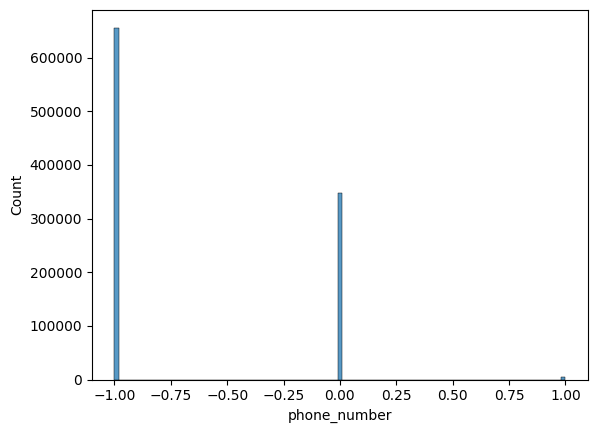

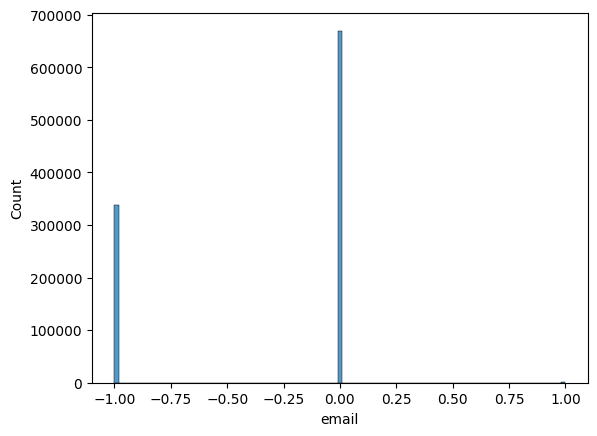

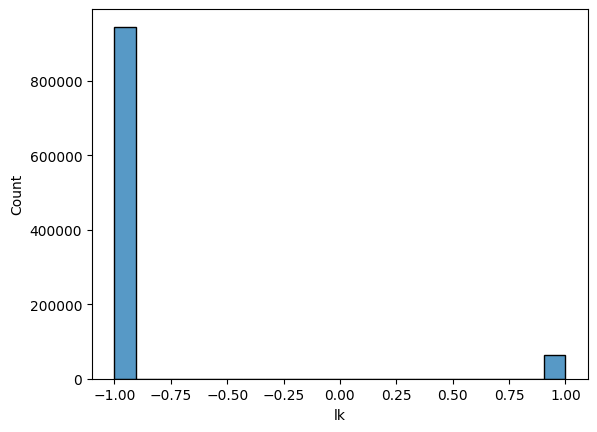

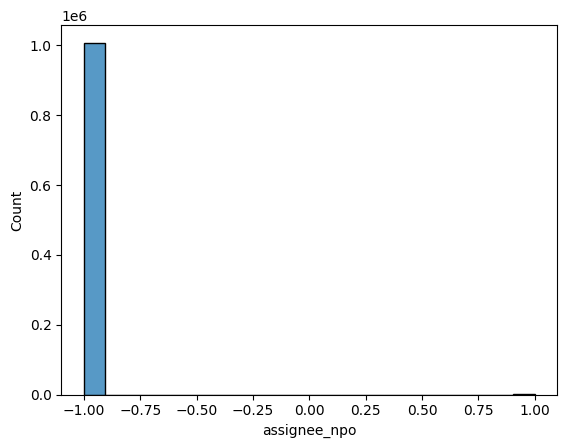

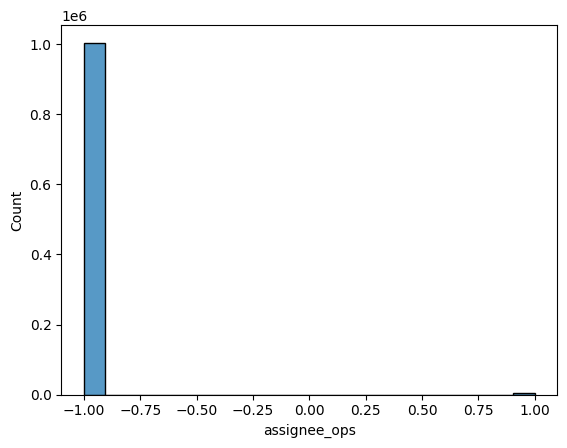

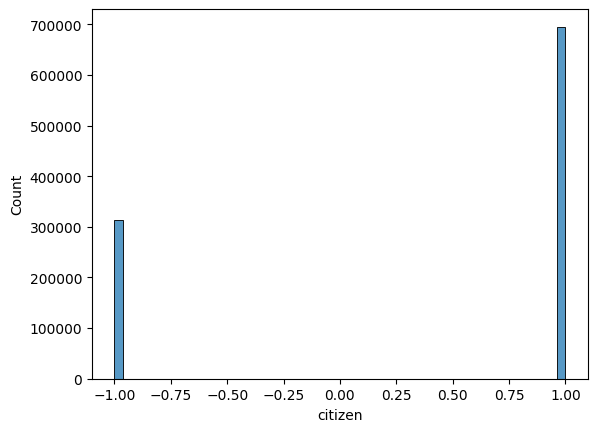

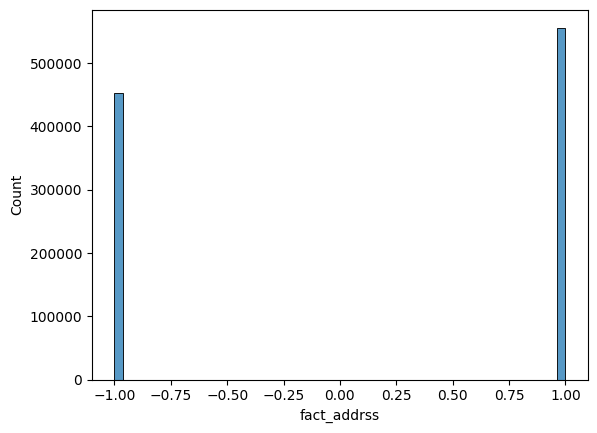

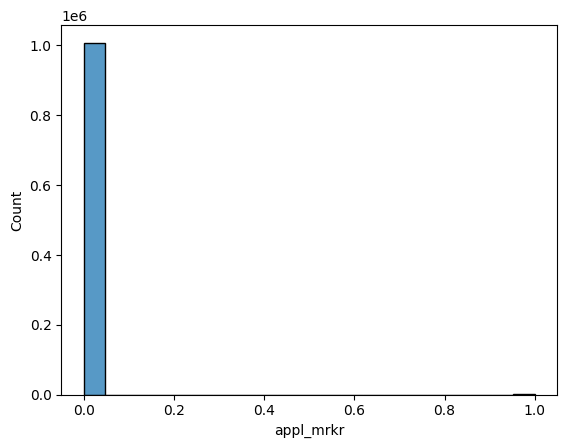

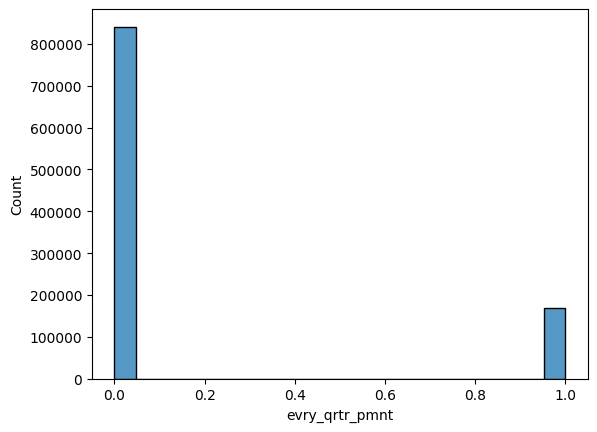

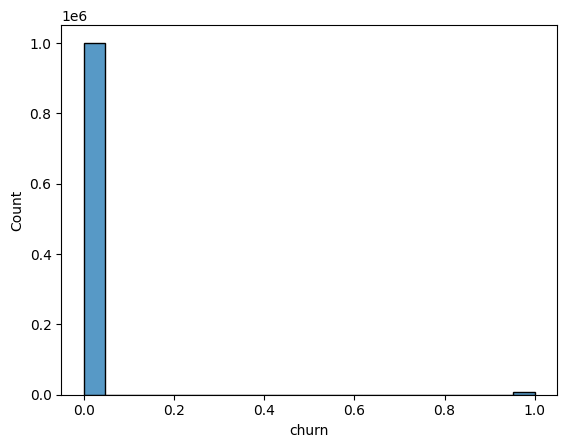

In [17]:
for col in int_cols:
    sns.histplot(buffer[col])
    plt.show()

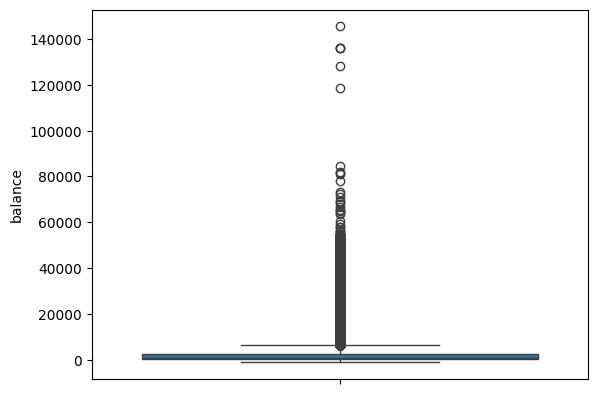

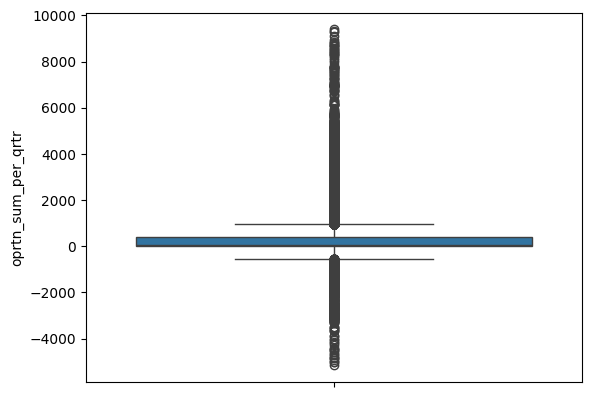

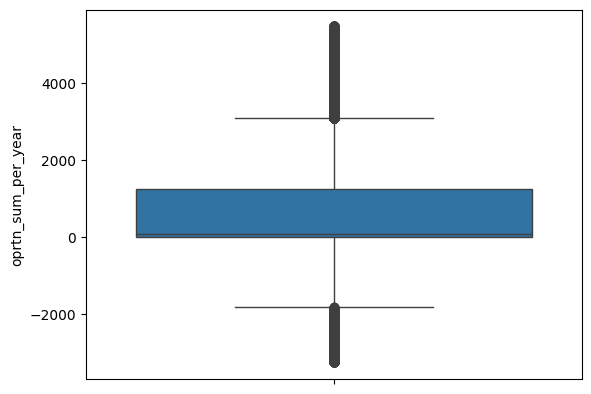

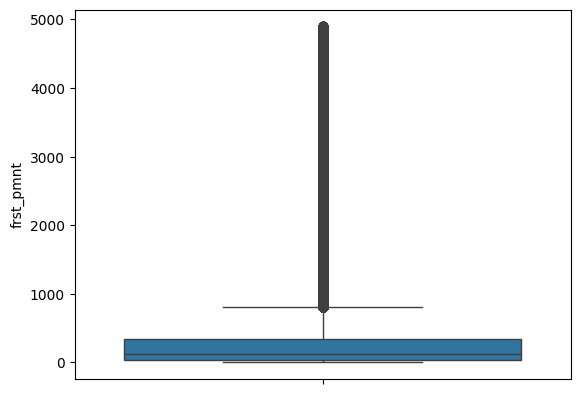

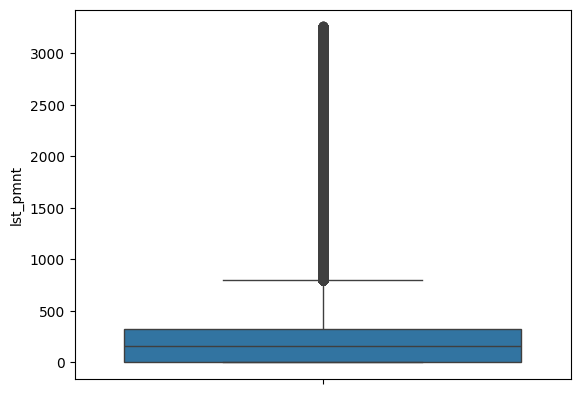

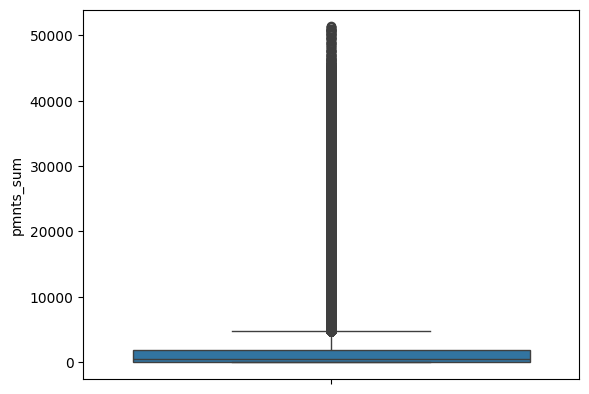

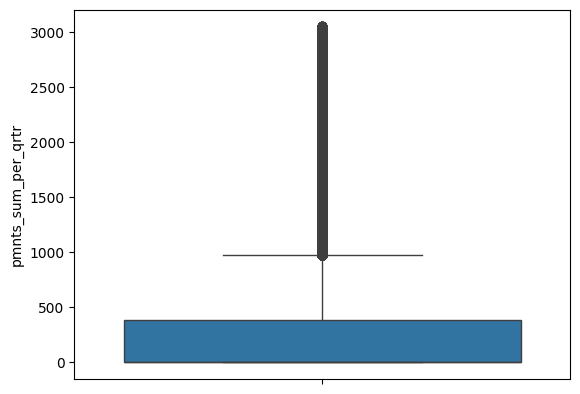

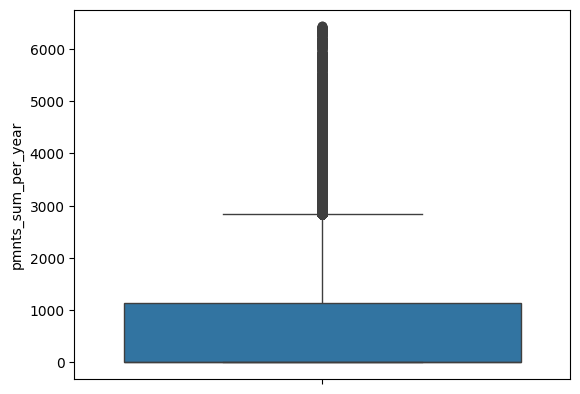

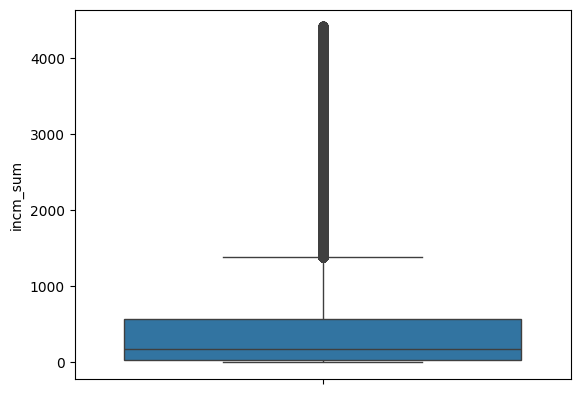

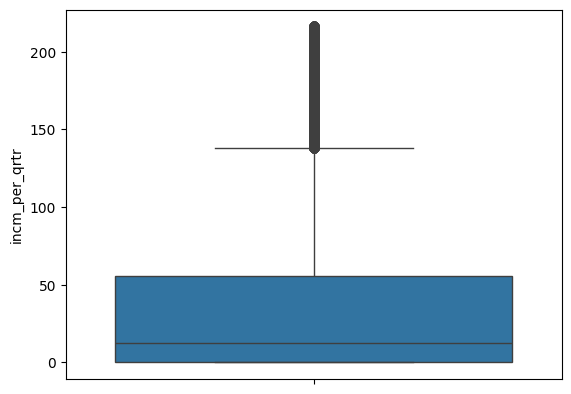

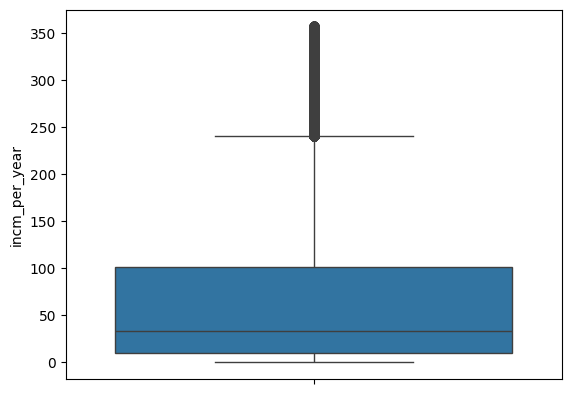

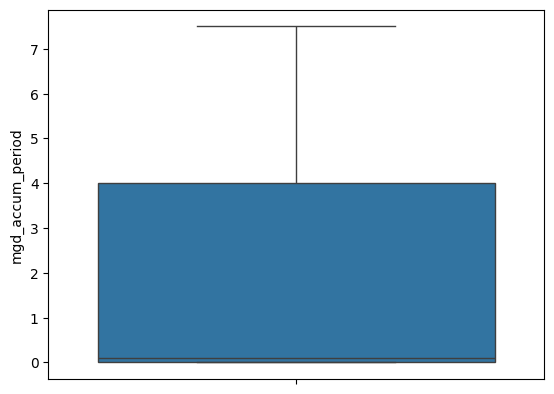

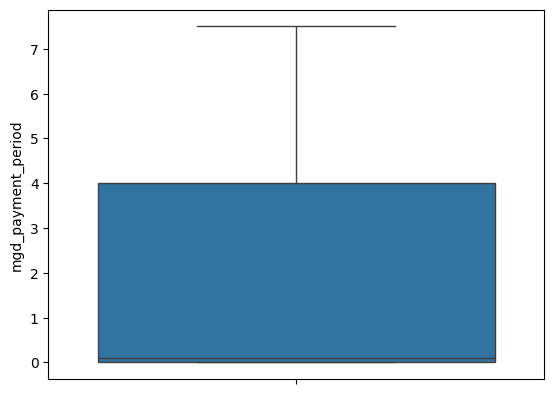

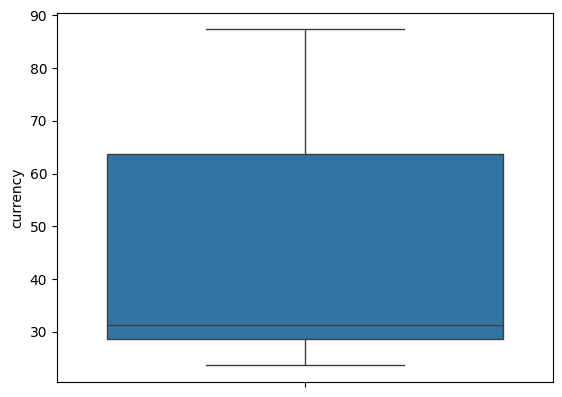

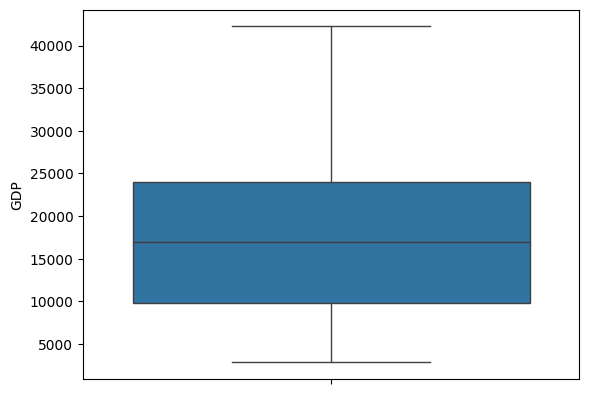

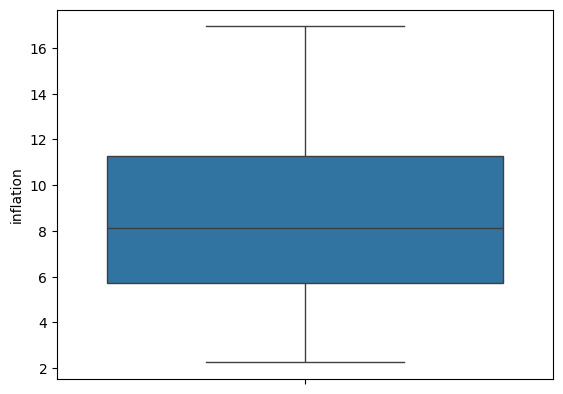

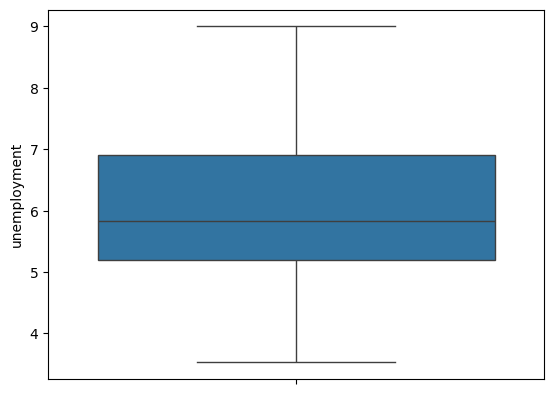

In [18]:
for col in float_cols:
    sns.boxplot(buffer[col])
    plt.show()

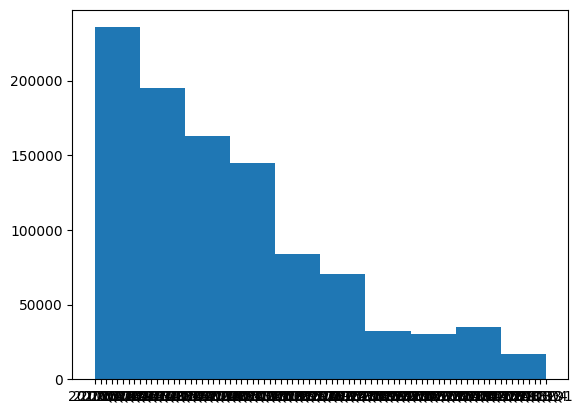

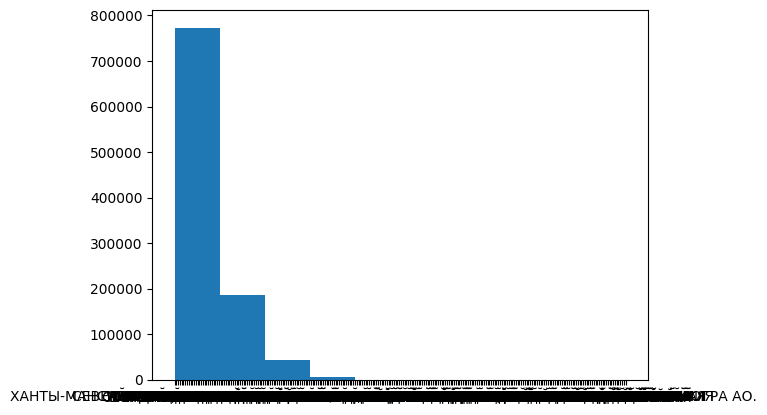

In [19]:
for col in cat_cols:
    plt.hist(buffer[col])
    plt.show()

Матрица корреляции

<Axes: >

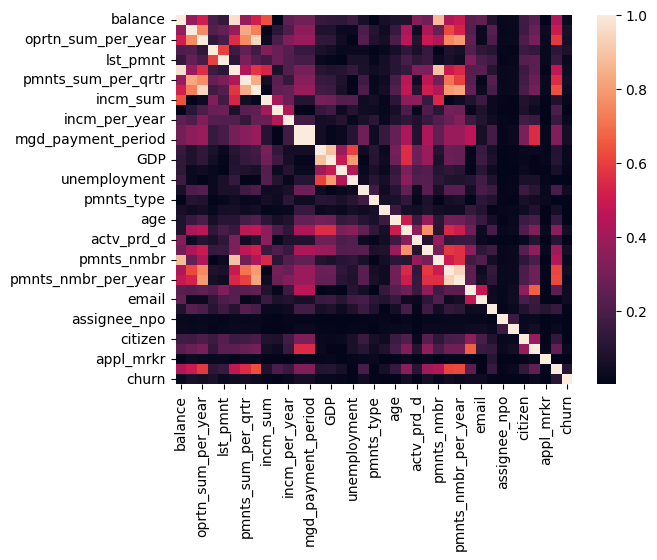

In [20]:
sns.heatmap(np.abs(buffer[float_cols + int_cols].corr()))

## Преобразование данных

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

class IntegerFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, df: pd.DataFrame, y: None = None) -> BaseEstimator:
        self.dataframe = df
        # self.dataframe['actv_prd_d'] = (self.dataframe['actv_prd_d'] - self.dataframe['actv_prd_d'].mean()) / self.dataframe['actv_prd_d'].std()
        # self.dataframe['lst_pmnt_rcnc_d'] = (self.dataframe['lst_pmnt_rcnc_d'] - self.dataframe['lst_pmnt_rcnc_d'].mean()) / self.dataframe['lst_pmnt_rcnc_d'].std()
        self.dataframe['gender'] = self.dataframe['gender'].replace([1, -1], [1, 0])
        self.dataframe['has_communication'] = (self.dataframe['email'] == 1) | (self.dataframe['phone_number'] == 1)
        self.dataframe.drop(columns=['email', 'phone_number', 'churn'], inplace=True)
        
        return self
    
    def transform(self, X: None = None) -> pd.DataFrame:
        return self.dataframe
    

trans = IntegerFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer).head(5)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,...,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,currency,GDP,inflation,unemployment,has_close_office,has_communication
0,1,2,2017Q4,1,48,8091,0,6757,679.37,31.34,...,-1,-1,0,0,58.402211,25621.2,2.583333,5.07,False,False
2,1,1,2010Q1,1,47,1163,1121,34,5569.85,463.41,...,1,1,0,1,29.842293,9995.8,7.220000,8.67,True,False
3,1,1,2005Q4,0,42,47,0,0,81.37,81.37,...,1,1,0,1,28.713011,6228.1,11.286667,7.00,False,False
4,2,2,2007Q4,1,42,876,853,30,6937.65,794.36,...,1,1,0,1,24.648172,9797.0,11.396667,5.80,True,False
9,2,1,2007Q3,0,25,175,153,28,1017.85,343.96,...,1,1,0,1,25.503326,8902.7,8.880000,5.53,True,False


In [41]:
from sklearn.preprocessing import LabelEncoder


class CatFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, X: pd.DataFrame) -> BaseEstimator:
        self.dataframe = X
        self.dataframe['quarter'] = self.dataframe['quarter'].replace(r'\d{4}Q', '', regex=True)
        scaler1 = LabelEncoder().fit(self.dataframe['region'])
        self.dataframe['region'] = scaler1.transform(self.dataframe['region'])
        return self
    
    def transform(self, X: None = None) -> np.ndarray:
        return self.dataframe


trans = CatFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,...,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment,has_close_office
0,1,2,4,1,48,8091,0,6757,679.37,31.34,...,-1,-1,0,0,0,58.402211,25621.2,2.583333,5.07,False
2,1,1,1,1,47,1163,1121,34,5569.85,463.41,...,1,1,0,1,0,29.842293,9995.8,7.220000,8.67,True
3,1,1,4,-1,42,47,0,0,81.37,81.37,...,1,1,0,1,0,28.713011,6228.1,11.286667,7.00,False
4,2,2,4,1,42,876,853,30,6937.65,794.36,...,1,1,0,1,0,24.648172,9797.0,11.396667,5.80,True
9,2,1,3,-1,25,175,153,28,1017.85,343.96,...,1,1,0,1,0,25.503326,8902.7,8.880000,5.53,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589885,1,3,4,-1,52,857,0,855,910.85,47.33,...,1,1,0,0,0,72.654305,40111.5,8.310000,4.30,False
3589889,1,3,3,1,38,2638,2614,28,30285.05,975.61,...,-1,1,0,1,0,65.551482,27196.8,2.986667,4.60,True
3589906,2,2,2,1,27,198,183,30,552.28,236.59,...,-1,-1,0,0,0,28.005323,14434.8,9.540000,6.43,False
3589910,1,2,4,1,31,1616,0,731,3080.98,118.50,...,1,1,0,0,0,24.648172,9797.0,11.396667,5.80,True


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


offices = ["МОСКВА Г", "САНКТ-ПЕТЕРБУРГ Г", "ВОЛОГОДСКАЯ ОБЛ", "ОРЛОВСКАЯ ОБЛ", "ЛИПЕЦКАЯ ОБЛ", "РОСТОВСКАЯ ОБЛ", "НИЖЕГОРОДСКАЯ ОБЛ", "ПЕРМСКИЙ КРАЙ", "ЕКАТЕРИНБУРГ Г", "ЧЕЛЯБИНСК Г", "НОВОСИБИРСК Г", "ИРКУТСКАЯ ОБЛ"]
buffer['has_close_office'] = buffer['region'].copy()
buffer['has_close_office'] = buffer['has_close_office'].apply(lambda x: x in offices)

transformer = ColumnTransformer(
    transformers=(
        ('int_trans', IntegerFeaturesTransformer(), int_cols),
        ('cat_trans', CatFeaturesTransformer(), cat_cols),
        ('float', 'passthrough', float_cols)
    )
)

transformer.fit(buffer.copy())

X, y = transformer.transform(buffer).astype(np.float32), buffer['churn'].to_numpy(dtype=np.int16)

In [43]:
X.shape, y.shape

((1008745, 37), (1008745,))

# Кросс-валидация моделей

In [45]:
len(train_df.loc[train_df['churn'] == 1]) / len(train_df)

0.016606926184925264

In [46]:
np.count_nonzero(y) / (y.size)

0.007880088624974597

In [47]:
from sklearn.model_selection import train_test_split, LearningCurveDisplay
from sklearn.metrics import f1_score, RocCurveDisplay, precision_score, recall_score, ConfusionMatrixDisplay


def validate(model: BaseEstimator) -> pd.DataFrame:
    dict_ = {
        'metric': [],
        'score': []
    }
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=seed)
    LearningCurveDisplay.from_estimator(model, X=X_train, y=y_train)
    plt.show()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    for metric in (f1_score, precision_score, recall_score):
        dict_['metric'].append(metric.__name__)
        dict_['score'].append(metric(y_test, y_pred))
        
    RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
        
    return pd.DataFrame(dict_)

In [53]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

[LightGBM] [Info] Number of positive: 439, number of negative: 56050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4314
[LightGBM] [Info] Number of data points in the train set: 56489, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007771 -> initscore=-4.849500
[LightGBM] [Info] Start training from score -4.849500
[LightGBM] [Info] Number of positive: 1445, number of negative: 182146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 183591, number of used features: 37
[LightGBM] [Info] [

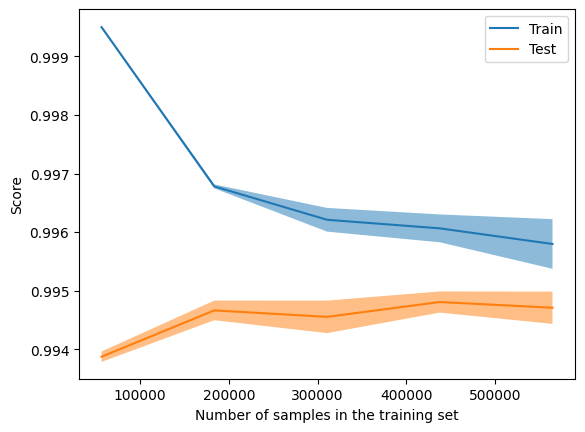

[LightGBM] [Info] Number of positive: 5684, number of negative: 700437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 706121, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008050 -> initscore=-4.814049
[LightGBM] [Info] Start training from score -4.814049


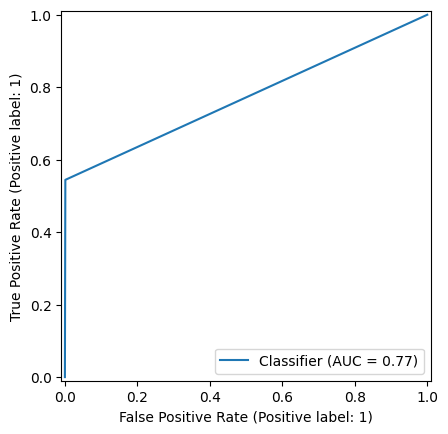

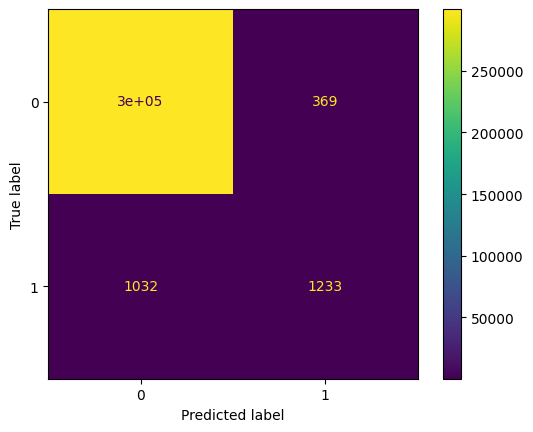

,metric,score
0,f1_score,0.637704
1,precision_score,0.769663
2,recall_score,0.544371


In [57]:
validate(LGBMClassifier(random_state=seed))

Learning rate set to 0.05768
0:	learn: 0.5458243	total: 7.66ms	remaining: 7.65s
1:	learn: 0.4275537	total: 14.4ms	remaining: 7.17s
2:	learn: 0.3446399	total: 21.1ms	remaining: 7.02s
3:	learn: 0.2759431	total: 28.6ms	remaining: 7.11s
4:	learn: 0.2221268	total: 35.4ms	remaining: 7.05s
5:	learn: 0.1853988	total: 43.3ms	remaining: 7.17s
6:	learn: 0.1556110	total: 49.9ms	remaining: 7.08s
7:	learn: 0.1298012	total: 57.6ms	remaining: 7.14s
8:	learn: 0.1105900	total: 63.5ms	remaining: 6.99s
9:	learn: 0.0955808	total: 70.8ms	remaining: 7.01s
10:	learn: 0.0825078	total: 77.2ms	remaining: 6.94s
11:	learn: 0.0719577	total: 83.7ms	remaining: 6.89s
12:	learn: 0.0646789	total: 91.5ms	remaining: 6.95s
13:	learn: 0.0586376	total: 97.8ms	remaining: 6.88s
14:	learn: 0.0531182	total: 105ms	remaining: 6.89s
15:	learn: 0.0489064	total: 112ms	remaining: 6.87s
16:	learn: 0.0456525	total: 118ms	remaining: 6.85s
17:	learn: 0.0430802	total: 126ms	remaining: 6.87s
18:	learn: 0.0410444	total: 133ms	remaining: 6.85

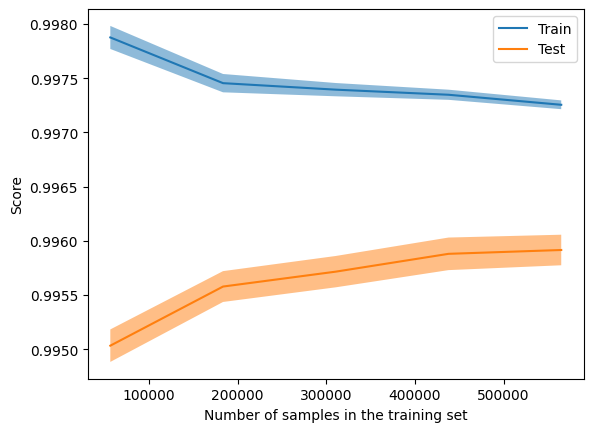

Learning rate set to 0.169592
0:	learn: 0.3322684	total: 53.6ms	remaining: 53.5s
1:	learn: 0.1658810	total: 111ms	remaining: 55.2s
2:	learn: 0.0933258	total: 170ms	remaining: 56.4s
3:	learn: 0.0607185	total: 236ms	remaining: 58.8s
4:	learn: 0.0466493	total: 299ms	remaining: 59.4s
5:	learn: 0.0378348	total: 364ms	remaining: 1m
6:	learn: 0.0336098	total: 426ms	remaining: 1m
7:	learn: 0.0312228	total: 503ms	remaining: 1m 2s
8:	learn: 0.0291763	total: 569ms	remaining: 1m 2s
9:	learn: 0.0281411	total: 633ms	remaining: 1m 2s
10:	learn: 0.0269915	total: 698ms	remaining: 1m 2s
11:	learn: 0.0262116	total: 765ms	remaining: 1m 2s
12:	learn: 0.0257518	total: 829ms	remaining: 1m 2s
13:	learn: 0.0254186	total: 894ms	remaining: 1m 2s
14:	learn: 0.0249115	total: 954ms	remaining: 1m 2s
15:	learn: 0.0244500	total: 1.02s	remaining: 1m 2s
16:	learn: 0.0242182	total: 1.08s	remaining: 1m 2s
17:	learn: 0.0236828	total: 1.15s	remaining: 1m 2s
18:	learn: 0.0233404	total: 1.22s	remaining: 1m 2s
19:	learn: 0.022

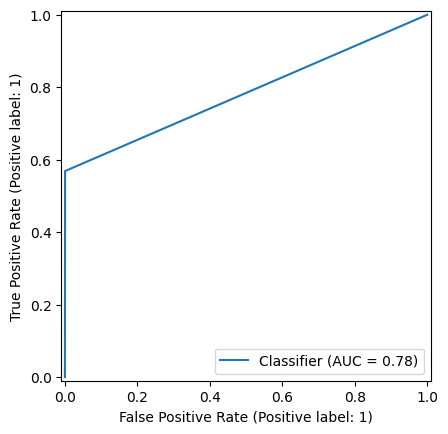

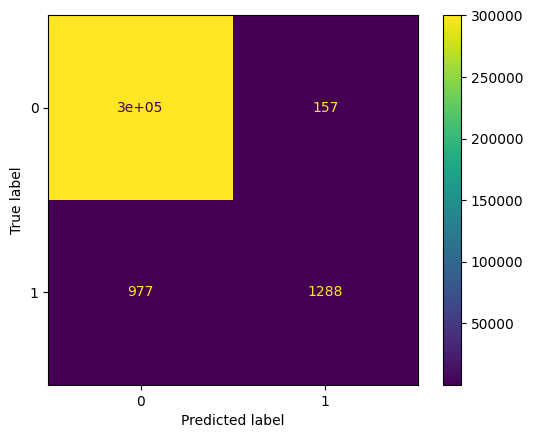

,metric,score
0,f1_score,0.694340
1,precision_score,0.891349
2,recall_score,0.568653


In [56]:
validate(CatBoostClassifier(random_state=seed))

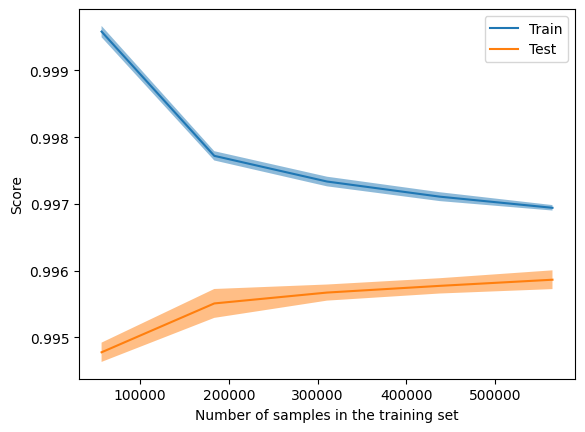

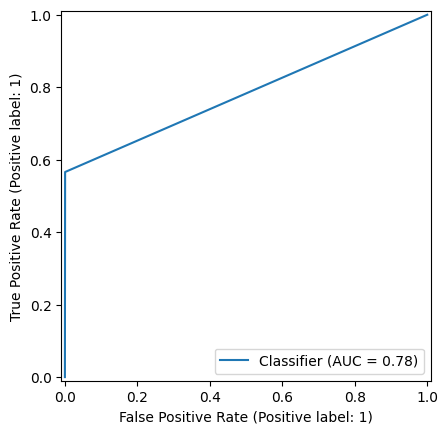

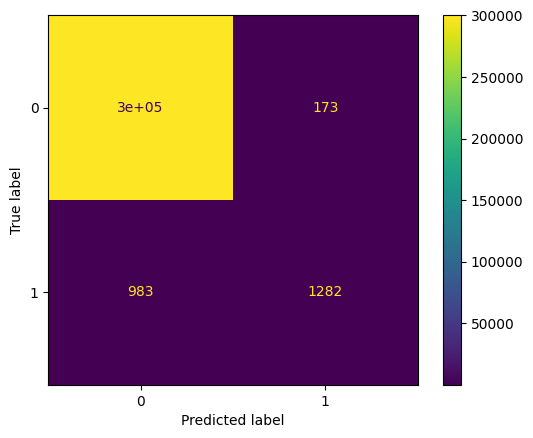

,metric,score
0,f1_score,0.689247
1,precision_score,0.881100
2,recall_score,0.566004


In [58]:
validate(XGBClassifier(random_state=seed))

# Voting ансамбль

In [59]:
estimators = [
    ('lgbm', LGBMClassifier(random_state=seed)),
    ('xgb', XGBClassifier(random_state=seed)),
    ('cat', CatBoostClassifier(random_state=seed))
]

In [64]:
from sklearn.linear_model import RidgeClassifier


def make_coefs(estimators: list[tuple[str, BaseEstimator]], X: np.ndarray, y: np.ndarray) -> np.ndarray:
    result = np.empty((len(estimators), len(buffer)))
    
    for i in range(len(estimators)):
        _, estimator = estimators[i]
        estimator.fit(X, y)
        result[i] = estimator.predict(X)
    
    return result.T


ridge_X, ridge_y = make_coefs(estimators, X, y), buffer['churn'].to_numpy()
weights = RidgeClassifier(random_state=seed).fit(ridge_X, ridge_y).coef_[0]
print(weights / weights.sum())

[LightGBM] [Info] Number of positive: 7949, number of negative: 1000796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365
[LightGBM] [Info] Number of data points in the train set: 1008745, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007880 -> initscore=-4.835505
[LightGBM] [Info] Start training from score -4.835505
Learning rate set to 0.197492
0:	learn: 0.2958870	total: 69.7ms	remaining: 1m 9s
1:	learn: 0.1312342	total: 137ms	remaining: 1m 8s
2:	learn: 0.0727818	total: 219ms	remaining: 1m 12s
3:	learn: 0.0496214	total: 288ms	remaining: 1m 11s
4:	learn: 0.0379461	total: 383ms	remaining: 1m 16s
5:	learn: 0.0330071	total: 471ms	remaining: 1m 18s
6:	learn: 0.0302097	total: 540ms	remaining: 1m 16s
7:	learn: 0.0288216	total: 613ms	remaining: 1m 15s
8:

In [65]:
from sklearn.ensemble import VotingClassifier


clf = VotingClassifier(estimators=estimators,
                       n_jobs=-1,
                       weights=weights,
                       voting='soft')
clf

VotingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=739)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=Non...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=739, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x3f1d24a50>)],
                 n_jobs=-1, voting='soft',
                 weights=array([0.13476182, 0.38898056, 1.4727628 ]))

Обучение и тестирование ансамбля

In [66]:
from sklearn.model_selection import KFold


scores = np.zeros(5)
cv = KFold(5)
for fold, (train, test) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    clf.fit(X_train, y_train)
    
    scores[fold] = f1_score(y_test, clf.predict(X_test))
    print(f'Fold: {fold + 1}, F1 score: {scores[fold]:.5f}')

print(scores, scores.mean())

[LightGBM] [Info] Number of positive: 6404, number of negative: 800592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 806996, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007936 -> initscore=-4.828429
[LightGBM] [Info] Start training from score -4.828429
Learning rate set to 0.179543
0:	learn: 0.3164591	total: 155ms	remaining: 2m 34s
1:	learn: 0.1532102	total: 273ms	remaining: 2m 16s
2:	learn: 0.0852582	total: 377ms	remaining: 2m 5s
3:	learn: 0.0557256	total: 499ms	remaining: 2m 4s
4:	learn: 0.0431074	total: 637ms	remaining: 2m 6s
5:	learn: 0.0352524	total: 730ms	remaining: 2m
6:	learn: 0.0315588	total: 820ms	remaining: 1m 56s
7:	learn: 0.0290636	total: 932ms	remaining: 1m 55s
8:	learn: 

Метрики ансамбля

Calculation time on 1008745 samples: 1.860 s


,metric,score
0,f1_score,0.764236
1,precision_score,0.965796
2,recall_score,0.632281


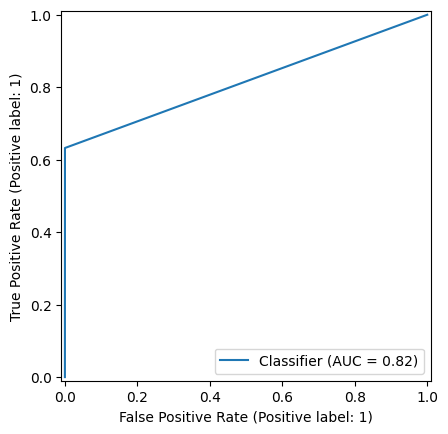

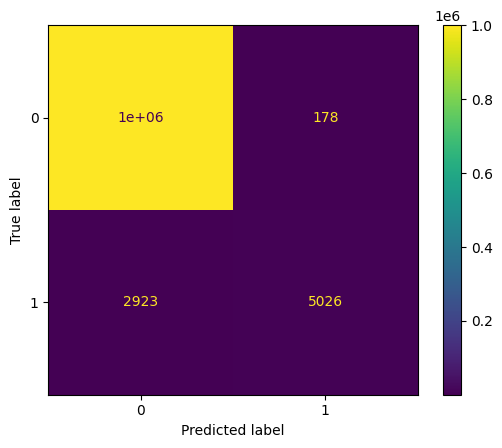

In [67]:
from sklearn.metrics import f1_score, precision_score, recall_score
from time import time


metrics = [
    f1_score,
    precision_score,
    recall_score
]

start_time = time()
y_pred = clf.predict(X)
print(f'Calculation time on {y.size} samples: {(time() - start_time):.3f} s')

RocCurveDisplay.from_predictions(y, y_pred)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
pd.DataFrame({
    'metric': [metric.__name__ for metric in metrics],
    'score': [metric(y, y_pred) for metric in metrics]
})

Сравнение предсказанных данных и реальных данных

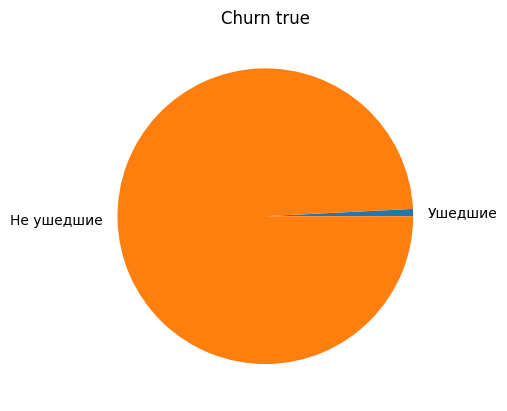

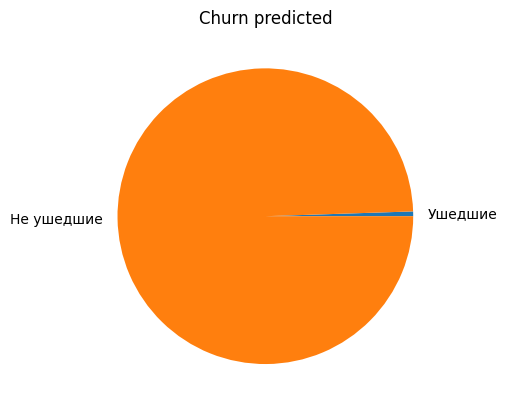

In [68]:
labels = ['Ушедшие', 'Не ушедшие']

data = [np.count_nonzero(y), y.size - np.count_nonzero(y)]
plt.pie(data, labels=labels)
plt.title('Churn true')
plt.show()

data = [np.count_nonzero(y_pred), y_pred.size - np.count_nonzero(y_pred)]
plt.pie(data, labels=labels)
plt.title('Churn predicted')
plt.show()